In [1]:
from __future__ import print_function

import numpy
import pandas

import sklearn.metrics
import sklearn.datasets
import sklearn.model_selection

import keras
print(keras.__version__)

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


2.2.4


In [2]:
# Загружаем данные
X_full, y_full = sklearn.datasets.load_digits(n_class=10, return_X_y=True)

In [3]:
# Разбиваем набор данных на Train и Test
X, Xt, y, yt = sklearn.model_selection.train_test_split(X_full, y_full, test_size=0.3, random_state=0)

In [4]:
# Преобразуем данные изображений в тензоры
X = X.reshape((X.shape[0], 8, 8, 1))
Xt = Xt.reshape((Xt.shape[0], 8, 8, 1))
print(X.shape, Xt.shape)

(1257, 8, 8, 1) (540, 8, 8, 1)


In [5]:
# Преобразуем данные меток в тензоры
y = keras.utils.to_categorical(y, num_classes=10)
yt = keras.utils.to_categorical(yt, num_classes=10)
print(y.shape, yt.shape)

(1257, 10) (540, 10)


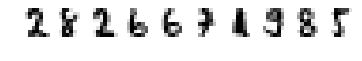

In [6]:
# Посмотрим на картинки глазами
c = 1
for image in Xt[:10]:
    plt.subplot(2, 10, c)
    plt.axis('off')
    plt.imshow(image[:,:,0], cmap=plt.cm.gray_r, interpolation='nearest')
    c += 1
plt.show()

In [7]:
# Описываем модель для классификации цифр
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3), input_shape=(8, 8, 1)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=12, kernel_size=(3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(filters=10, kernel_size=(1, 1)))
model.add(keras.layers.Activation('softmax'))
model.add(keras.layers.Flatten())

# Компилируем модель
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 6, 6)           60        
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 6)           0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 6)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 12)          660       
_________________________________________________________________
activation_2 (Activation)    (None, 1, 1, 12)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          130       
_________________________________________________________________
activation_3 (Activation)    (None, 1, 1, 10)          0         
__________

In [9]:
# Обучим модель
model.fit(X, y, epochs=10, batch_size=64)

Epoch 1/10
1257/1257 [==============================] - 1s 441us/step - loss: 1.8965 - acc: 0.3126
Epoch 2/10
1257/1257 [==============================] - 0s 77us/step - loss: 0.8684 - acc: 0.7263
Epoch 3/10
1257/1257 [==============================] - 0s 125us/step - loss: 0.5555 - acc: 0.8154
Epoch 4/10
1257/1257 [==============================] - 0s 137us/step - loss: 0.3390 - acc: 0.8839
Epoch 5/10
1257/1257 [==============================] - 0s 156us/step - loss: 0.2433 - acc: 0.9220
Epoch 6/10
1257/1257 [==============================] - 0s 107us/step - loss: 0.1990 - acc: 0.9403
Epoch 7/10
1257/1257 [==============================] - 0s 76us/step - loss: 0.1671 - acc: 0.9451
Epoch 8/10
1257/1257 [==============================] - 0s 93us/step - loss: 0.1362 - acc: 0.9554
Epoch 9/10
1257/1257 [==============================] - 0s 120us/step - loss: 0.1136 - acc: 0.9602
Epoch 10/10
1257/1257 [==============================] - 0s 92us/step - loss: 0.1006 - acc: 0.9634


In [10]:
# Оценим модель на тестовом наборе
score = model.evaluate(Xt, yt)
print('Test loss: %.4f, acc: %.4f\n' % tuple(score))

pred = model.predict(Xt)
print("Confusion matrix:\n%s" % sklearn.metrics.confusion_matrix(numpy.argmax(yt, axis=1), numpy.argmax(pred, axis=1)))

540/540 [==============================] - 0s 194us/step
Test loss: 0.2511, acc: 0.9111

Confusion matrix:
[[44  0  0  0  0  0  1  0  0  0]
 [ 0 42  0  0  4  1  0  0  5  0]
 [ 0  0 48  2  0  0  0  0  3  0]
 [ 0  0  2 52  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 52  2  0  0  3]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 1  0  0  0  6  0  0 46  0  0]
 [ 0  1  0  1  1  0  8  1 47  2]
 [ 0  0  0  1  0  0  0  0  1 55]]
